In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime as d

In [3]:
df = pd.read_csv("data.csv", encoding='ISO-8859-1')

In [4]:
print(df.head())
print(df.info())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo   

In [5]:
df.dropna(subset=['CustomerID'], inplace=True)

In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [7]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [8]:
print("Number of unique customers:", df['CustomerID'].nunique())
print("Top 5 selling products:\n", df['Description'].value_counts().head())

Number of unique customers: 4372
Top 5 selling products:
 Description
WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
Name: count, dtype: int64


C:\Users\meetr\AppData\Local\Temp\ipykernel_24820\1079314603.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('InvoiceDate')['TotalPrice'].resample('M').sum().plot()


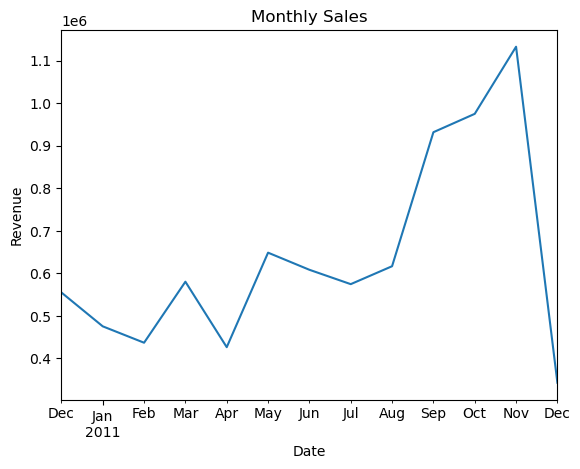

In [9]:
df.set_index('InvoiceDate')['TotalPrice'].resample('M').sum().plot()
plt.title("Monthly Sales")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

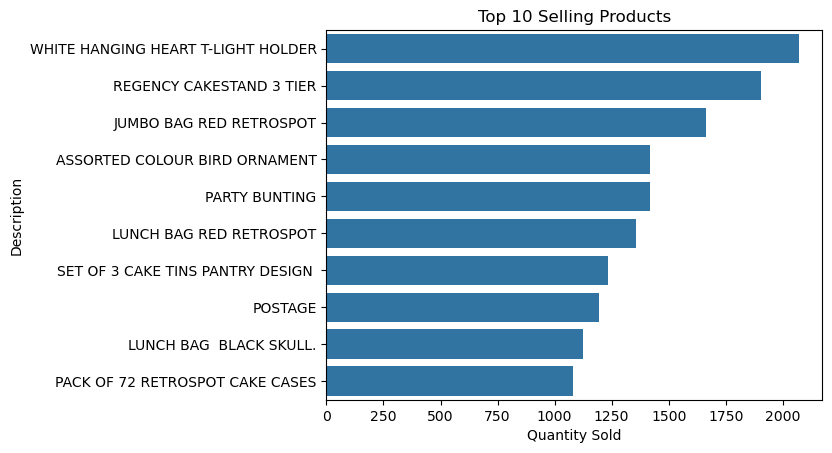

In [10]:
top_products = df['Description'].value_counts().head(10)
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Selling Products")
plt.xlabel("Quantity Sold")
plt.show()

In [11]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [12]:
print(rfm.head())

            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          2      0.00
12347.0           2          7   4310.00
12348.0          75          4   1797.24
12349.0          19          1   1757.55
12350.0         310          1    334.40


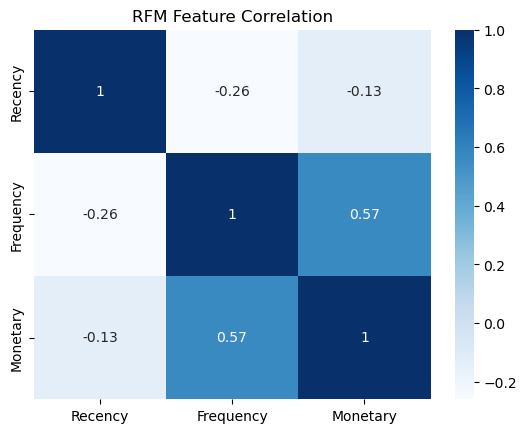

In [13]:
sns.heatmap(rfm.corr(), annot=True, cmap="Blues")
plt.title("RFM Feature Correlation")
plt.show()

In [14]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

In [15]:
df.to_csv("cleaned_ecommerce_data.csv", index=False)